In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [2]:
df = pd.read_csv('./data/Car_Insurance_Claim.csv')

In [3]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [5]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [6]:
for i in df["INCOME"].unique():
    mu = df[df["INCOME"]==i]["CREDIT_SCORE"].mean()
    df.loc[(df["INCOME"]==i) & (df["CREDIT_SCORE"].isna()),"CREDIT_SCORE"]=mu


In [7]:
for i in df["MARRIED"].unique():
    mu = df[df["MARRIED"]==i]["ANNUAL_MILEAGE"].mean()
    df.loc[(df["MARRIED"]==i) & (df["ANNUAL_MILEAGE"].isna()),"ANNUAL_MILEAGE"]=mu

In [8]:
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='Density'>

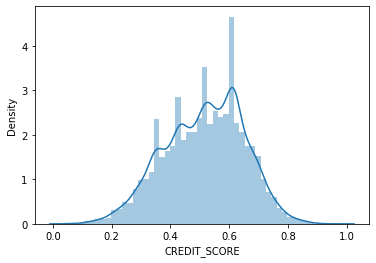

In [9]:
sns.distplot(df['CREDIT_SCORE'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANNUAL_MILEAGE', ylabel='Density'>

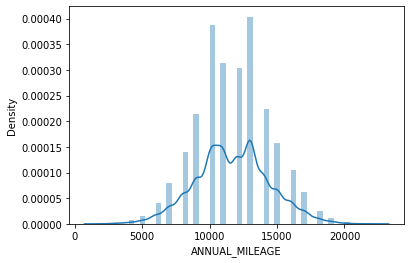

In [10]:
sns.distplot(df['ANNUAL_MILEAGE'])

<AxesSubplot:title={'center':'Age Count colored by outcome'}, xlabel='AGE', ylabel='count'>

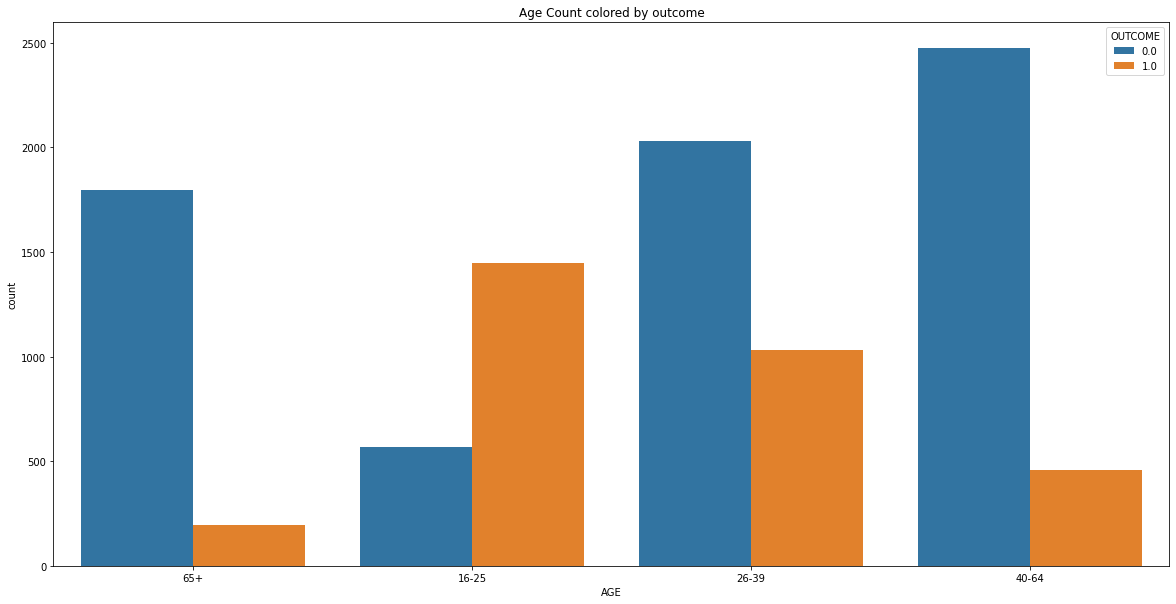

In [11]:
plt.figure(figsize=(20,10))
plt.title('Age Count colored by outcome')
sns.countplot(data=df, x ='AGE', hue='OUTCOME')

<AxesSubplot:title={'center':'Boxplot of Credit Score'}, xlabel='CREDIT_SCORE'>

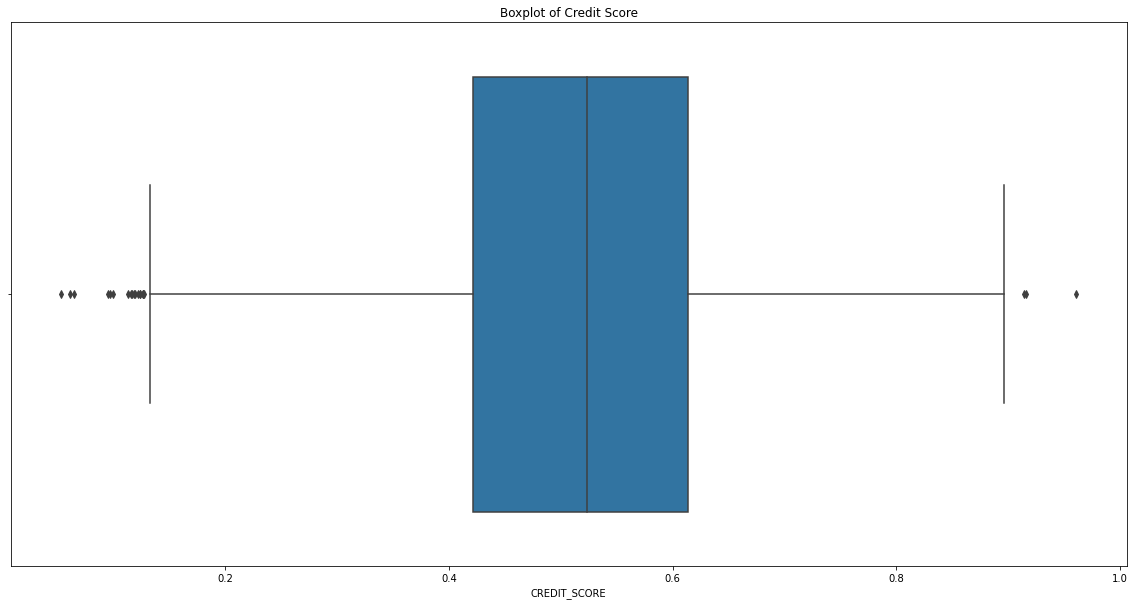

In [12]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Credit Score')
sns.boxplot(data=df, x='CREDIT_SCORE')

<AxesSubplot:title={'center':'Correlation with the response variable'}>

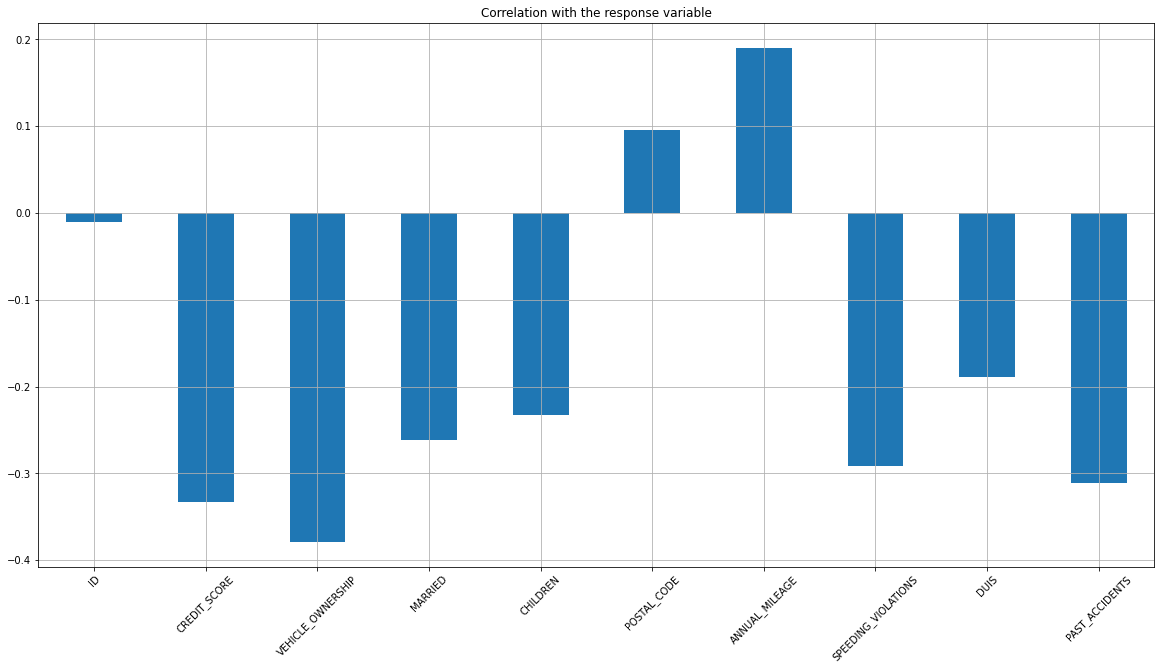

In [13]:
df.drop(columns = ['OUTCOME']).corrwith(df.OUTCOME).plot.bar(figsize = (20,10), grid = True, rot = 45, title='Correlation with the response variable')

In [14]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
ros = RandomOverSampler(random_state=42)

In [17]:
obj_cols = [i for i in df.columns if df[i].dtype == 'O']
label_enc = LabelEncoder()
for i in obj_cols:
    df[i] = label_enc.fit_transform(df[i])

In [18]:
def standardscaler(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

In [19]:
def best_model(X, y, scaler, algo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

    X_train, y_train = ros.fit_resample(X_train, y_train)
    
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
        
    X_train, X_test = scaler(X_train, X_test)
    
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    model = algo()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    training_score = model.score(X_train, y_train)
    acc = accuracy_score(y_test, predictions)
    con = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f'Training Score: {training_score}')
    print(f'Accuracy Score: {acc}')
    print(f'Confusion Matrix: {con}')
    print(f'Classification Report: {report}')
    return acc, training_score

In [20]:
X = df.iloc[:, :-1]
y = df['OUTCOME']

In [21]:
list_algo = [KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]

list_of_accuracy = []
list_of_score = []

for i in list_algo:
    accuracyscore, trainingscore = best_model(X, y, standardscaler, i)
    list_of_accuracy.append(accuracyscore)
    list_of_score.append(trainingscore) 


Training Score: 0.8808646762310973
Accuracy Score: 0.7624
Confusion Matrix: [[1290  419]
 [ 175  616]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.88      0.75      0.81      1709
         1.0       0.60      0.78      0.67       791

    accuracy                           0.76      2500
   macro avg       0.74      0.77      0.74      2500
weighted avg       0.79      0.76      0.77      2500

Training Score: 1.0
Accuracy Score: 0.7912
Confusion Matrix: [[1472  250]
 [ 272  506]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      1722
         1.0       0.67      0.65      0.66       778

    accuracy                           0.79      2500
   macro avg       0.76      0.75      0.75      2500
weighted avg       0.79      0.79      0.79      2500

Training Score: 1.0
Accuracy Score: 0.8424
Confusion Matrix: [[1507  211]
 [ 183  599]]
Classification Report

In [23]:
acc_df = pd.DataFrame()
acc_df['Algo'] = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
acc_df['standard_acc'] = list_of_accuracy
acc_df['standard_training'] = list_of_score
acc_df

,Algo,standard_acc,standard_training
0,KNeighborsClassifier,0.7624,0.880865
1,DecisionTreeClassifier,0.7912,1.000000
2,RandomForestClassifier,0.8424,1.000000


In [26]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
model = RandomForestClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# define search
search = RandomizedSearchCV(model, random_grid, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
model = RandomForestClassifier
model.get_params()

In [32]:
from dfply import *

In [46]:
df >> select(
    X.ANNUAL_MILEAGE
    ) >> mask(
        X.ANNUAL_MILEAGE >= 1000
        ) >> arrange(
            desc(X.ANNUAL_MILEAGE)
        ) >> mutate(
            MEAN = X.ANNUAL_MILEAGE.mean()
        ) >> mutate(
            Normalized = X.ANNUAL_MILEAGE/X.MEAN
        )


,ANNUAL_MILEAGE,MEAN,Normalized
7339,22000.0,11696.362898,1.880927
7319,22000.0,11696.362898,1.880927
5153,21000.0,11696.362898,1.795430
4401,21000.0,11696.362898,1.795430
7548,21000.0,11696.362898,1.795430
...,...,...,...
1593,3000.0,11696.362898,0.256490
4984,3000.0,11696.362898,0.256490
6083,3000.0,11696.362898,0.256490
7180,2000.0,11696.362898,0.170993


<AxesSubplot:xlabel='OUTCOME'>

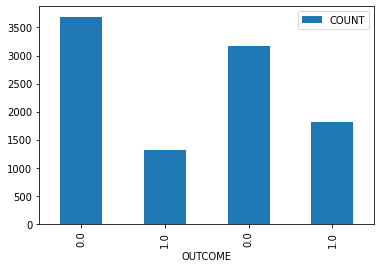

In [74]:
(df >> select(
    X.OUTCOME,
    X.GENDER,
    X.RACE
    ) >> group_by(
        X.GENDER,
        X.OUTCOME
    )>>summarise(
        COUNT=n(X.RACE)
        )).plot.bar(x="OUTCOME",y="COUNT")